<a href="https://colab.research.google.com/github/ITBA-Python/Certificacion-Profesional-Python/blob/main/Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%load_ext autoreload
%autoreload 2
sys.path.append('../') 
import Helper as faux
import pandas as pd
#from clases.Peliculas import Pelicula


#df_personas, df_trabajadores, df_usuarios, df_peliculas, df_scores=Faux.load_all()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ValueError: attempted relative import beyond top-level package

In [1]:
df = pd.read_csv('data/scores.csv')
df.columns()

NameError: name 'pd' is not defined

In [ ]:
# Acciones con la clase Peliculas

# Cargo el df método create_df_from_csv() directamente desde la clase
df_peliculas = Pelicula.create_df_from_csv("data/peliculas.csv")
print(df_peliculas.tail())


        id                                       Name Release Date  \
1677  1678                          Mat' i syn (1997)  06-Feb-1998   
1678  1679                           B. Monkey (1998)  06-Feb-1998   
1679  1680                       Sliding Doors (1998)  01-Jan-1998   
1680  1681                        You So Crazy (1994)  01-Jan-1994   
1681  1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

                                               IMDB URL  unknown  Action  \
1677  http://us.imdb.com/M/title-exact?Mat%27+i+syn+...        0       0   
1678  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...        0       0   
1679      http://us.imdb.com/Title?Sliding+Doors+(1998)        0       0   
1680  http://us.imdb.com/M/title-exact?You%20So%20Cr...        0       0   
1681  http://us.imdb.com/M/title-exact?Schrei%20aus%...        0       0   

      Adventure  Animation  Childrens  Comedy  ...  FilmNoir  Horror  Musical  \
1677          0          0          0    

In [ ]:

#Creo Instancias de Pelicula
NuevaPeliSinID = Pelicula("PeliSinID",2025,['Adventure','Comedy',"Children's","Fantasy"])
NuevaPeliConIDExistente = Pelicula("PeliConIDExistente",2020,['Horror','Musical'],820)

#Doy de Alta satisfactoriamente con el metodo write_df
df_peliculasAgregado = NuevaPeliSinID.write_df(df_peliculas)
print(f'Rows del df original: {df_peliculas.shape[0]}\nRows del df Agregado: {df_peliculasAgregado.shape[0]}\n')

#Doy de Alta insatisfactoriamente con el metodo write_df ya que el ID existe
df_peliculasAgregado2 = NuevaPeliConIDExistente.write_df(df_peliculas)
print(f'Rows del df original: {df_peliculas.shape[0]}\nRows del df Agregado2: {df_peliculasAgregado2.shape[0]}')


df_peliculasAgregado

Rows del df original: 1682
Rows del df Agregado: 1683

Error: No se pudo agregar, id ya existente
Rows del df original: 1682
Rows del df Agregado2: 1682


,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,DateNorm
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995-01-01 00:00:00
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1995-01-01 00:00:00
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995-01-01 00:00:00
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995-01-01 00:00:00
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998-02-06 00:00:00
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998-01-01 00:00:00
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1994-01-01 00:00:00
1681,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,http://us.imdb.com/M/title-exact?Schrei%20aus%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1996-03-08 00:00:00


In [68]:
#Vamos a Filtrar segun algunos criterios la df
ListaPelisFiltradas1= Pelicula.get_from_df(df_peliculas, nombre = 'space', anios = [1900,2000]) #El filtro de nombre es un contiene para ser mas abarcativo
ListaPelisFiltradas2= Pelicula.get_from_df(df_peliculas, generos = ['Comedy','Musical'], anios=[1900,1950])
ListaPelisFiltradas3= Pelicula.get_from_df(df_peliculas, id=135)

#Vamos a ver los filtros
print(f'Filtro1: cantidad {len(ListaPelisFiltradas1)} \n {ListaPelisFiltradas1}\n') # Se printean de acuerdo al metodo.__repr__ de la clase
print(f'Filtro2: cantidad {len(ListaPelisFiltradas2)}\n{ListaPelisFiltradas2}\n')
print(f'Filtro3: cantidad {len(ListaPelisFiltradas3)}\n{ListaPelisFiltradas3}')


Filtro1: cantidad 4 
 [
 [135] 2001: A Space Odyssey (1968) -Drama, Mystery, SciFi, Thriller-, 
 [758] Lawnmower Man 2: Beyond Cyberspace (1996) -SciFi, Thriller-, 
 [820] Space Jam (1996) -Adventure, Animation, Childrens, Comedy, Fantasy-, 
 [916] Lost in Space (1998) -Action, SciFi, Thriller-]

Filtro2: cantidad 4
[
 [835] Gay Divorcee, The (1934) -Comedy, Musical, Romance-, 
 [1203] Top Hat (1935) -Comedy, Musical, Romance-, 
 [1286] Shall We Dance? (1937) -Comedy, Musical, Romance-, 
 [1458] Damsel in Distress, A (1937) -Comedy, Musical, Romance-]

Filtro3: cantidad 1
[
 [135] 2001: A Space Odyssey (1968) -Drama, Mystery, SciFi, Thriller-]


In [ ]:
#Decidimos borrar de df_peliculas los resultados de ListaFiltrada2
print(f'Rows del df original: {df_peliculas.shape[0]}')

for x in ListaPelisFiltradas2:
    df_peliculas=x.remove_from_df(df_peliculas)

print(f'Rows del df luego del borrado: {df_peliculas.shape[0]}')



Rows del df original: 1682
id==835 and Name.str.contains("Gay Divorcee, The", case=False) and DateNorm >= "1934-01-01" and DateNorm <= "1934-12-31" and Comedy== 1 and Musical== 1 and Romance== 1
id==1203 and Name.str.contains("Top Hat", case=False) and DateNorm >= "1935-01-01" and DateNorm <= "1935-12-31" and Comedy== 1 and Musical== 1 and Romance== 1
id==1286 and Name.str.contains("Shall We Dance?", case=False) and DateNorm >= "1937-01-01" and DateNorm <= "1937-12-31" and Comedy== 1 and Musical== 1 and Romance== 1
id==1458 and Name.str.contains("Damsel in Distress, A", case=False) and DateNorm >= "1937-01-01" and DateNorm <= "1937-12-31" and Comedy== 1 and Musical== 1 and Romance== 1
Rows del df luego del borrado: 1678


In [ ]:
#Altero algun dato del filtro 3 por ejemplo el año y despues trato de borrarla
print(f'Rows del df original: {df_peliculas.shape[0]}')
ListaPelisFiltradas3[0].anio=2000
df_peliculas=ListaPelisFiltradas3[0].remove_from_df(df_peliculas)
print(f'Rows del df luego del intento de borrado: {df_peliculas.shape[0]}')

#Lo mismo ocurre si por ejemplo le agregamos un genero 
ListaPelisFiltradas3= Pelicula.get_from_df(df_peliculas, id=135)
ListaPelisFiltradas3[0].generos.append('Romance')
df_peliculas=ListaPelisFiltradas3[0].remove_from_df(df_peliculas)
print(f'Rows del df luego del intento de borrado: {df_peliculas.shape[0]}')

Rows del df original: 1678
id==135 and Name.str.contains("2001: A Space Odyssey", case=False) and DateNorm >= "2000-01-01" and DateNorm <= "2000-12-31" and Drama== 1 and Mystery== 1 and SciFi== 1 and Thriller== 1
No existe en el df recibido una película exactamente igual a la que invoca esta acción
Rows del df luego del intento de borrado: 1678
id==135
id==135 and Name.str.contains("2001: A Space Odyssey", case=False) and DateNorm >= "1968-01-01" and DateNorm <= "1968-12-31" and Drama== 1 and Mystery== 1 and SciFi== 1 and Thriller== 1 and Romance== 1
No existe en el df recibido una película exactamente igual a la que invoca esta acción
Rows del df luego del intento de borrado: 1678


In [ ]:
### GET STATS
print(df_peliculasAgregado.tail())

        id                                       Name Release Date  \
1678  1679                           B. Monkey (1998)  06-Feb-1998   
1679  1680                       Sliding Doors (1998)  01-Jan-1998   
1680  1681                        You So Crazy (1994)  01-Jan-1994   
1681  1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   
1682  1683                           PeliSinID (2025)            0   

                                               IMDB URL  unknown  Action  \
1678  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...        0       0   
1679      http://us.imdb.com/Title?Sliding+Doors+(1998)        0       0   
1680  http://us.imdb.com/M/title-exact?You%20So%20Cr...        0       0   
1681  http://us.imdb.com/M/title-exact?Schrei%20aus%...        0       0   
1682                                                  0        0       0   

      Adventure  Animation  Childrens  Comedy  ...  FilmNoir  Horror  Musical  \
1678          0          0          0    

In [13]:
Pelicula.get_stats(df_peliculas, generos=['Comedy'])


Cantidad de peliculas en la selección:505
Pelicula mas vieja:

 [430] Duck Soup (1933) -Comedy, War-

Pelicula mas reciente:

 [1649] Big One, The (1998) -Comedy, Documentary-


In [66]:
Pelicula.get_stats(df_peliculas, anios=[1945,2000])

Cantidad de peliculas en la selección:1626
4 películas comparten la fecha mas vieja:
[
 [445] Body Snatcher, The (1945) -Horror-, 
 [608] Spellbound (1945) -Mystery, Romance, Thriller-, 
 [624] Three Caballeros, The (1945) -Animation, Childrens, Musical-, 
 [1310] Walk in the Sun, A (1945) -Drama-]

Pelicula mas reciente:

 [315] Apt Pupil (1998) -Drama, Thriller-


In [ ]:
df_peliculas[df_peliculas['Name'].str.contains('2000')]

,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,DateNorm
361,362,Blues Brothers 2000 (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?Blues+Brother...,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1998-02-06


In [67]:

ListaPelisFiltradas2= Pelicula.filtrar_df(df_peliculas, generos = ['Comedy','Musical'], anios=[1900,2000])

ListaPelisFiltradas2

,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,DateNorm
20,21,Muppet Treasure Island (1996),16-Feb-1996,http://us.imdb.com/M/title-exact?Muppet%20Trea...,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1996-02-16
90,91,"Nightmare Before Christmas, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Nightmare%20B...,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1993-01-01
94,95,Aladdin (1992),01-Jan-1992,http://us.imdb.com/M/title-exact?Aladdin%20(1992),0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1992-01-01
185,186,"Blues Brothers, The (1980)",01-Jan-1980,http://us.imdb.com/M/title-exact?Blues%20Broth...,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1980-01-01
208,209,This Is Spinal Tap (1984),01-Jan-1984,http://us.imdb.com/M/title-exact?This%20Is%20S...,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1984-01-01
318,319,Everyone Says I Love You (1996),06-Dec-1996,http://us.imdb.com/M/title-exact?Everyone%20Sa...,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1996-12-06
351,352,Spice World (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-12...,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1997-01-01
361,362,Blues Brothers 2000 (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?Blues+Brother...,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1998-02-06
418,419,Mary Poppins (1964),01-Jan-1964,http://us.imdb.com/M/title-exact?Mary%20Poppin...,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1964-01-01
450,451,Grease (1978),01-Jan-1978,http://us.imdb.com/M/title-exact?Grease%20(1978),0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1978-01-01


In [ ]:
df_peliculas

,id,Name,Release Date,IMDB URL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,DateNorm
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1995-01-01
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1995-01-01
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995-01-01
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995-01-01
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998-02-06
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998-02-06
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998-01-01
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1994-01-01


In [39]:

#Pelicula.get_stats(df_peliculas, anios=[1960 , 1980])



In [70]:
import matplotlib as plt

df_grafico=Pelicula.filtrar_df(df_peliculas, anios=[1960 , 1980])
# Extraer el año de la columna 'Release Date'
df_grafico=Pelicula.filtrar_df(df_peliculas, anios=[1960 , 1980], generos=['Comedy','Fantasy','Crime'])
df_grafico['year'] = df_grafico['DateNorm'].dt.year
df_grafico.drop('DateNorm', axis='columns', inplace=True)

# Filtrar solo las columnas de géneros y el año
genre_columns = df_grafico.columns[5:]  # Suponiendo que las primeras columnas no son géneros
df_genres = df_grafico[ list(genre_columns)]




c:\Users\LS59282\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
# Sumar la cantidad de películas por género en cada año
genre_by_year = df_genres.groupby('year').sum()

# Rellenar NaN con 0 (opcional, si hay algún año sin películas)
genre_by_year = genre_by_year.fillna(0)

In [65]:
df_genres.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western,year


In [69]:
genre_by_year.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,


IndexError: index 0 is out of bounds for axis 0 with size 0

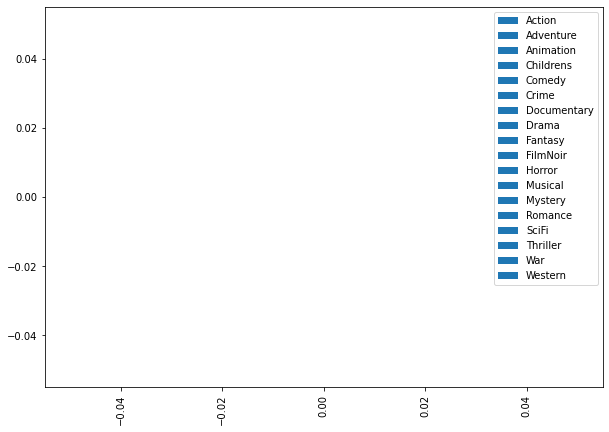

In [63]:
#genre_by_year = genre_by_year.set_index('year')

# Crear el gráfico de barras apiladas
genre_by_year.plot(kind='bar', stacked=True, figsize=(10, 7))

# Configurar las etiquetas y el título
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre by Year')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()